<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Progect_8_Bank_customer_churn_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd

In [83]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/My Drive/Kaggle'

In [84]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [85]:
!kaggle datasets download -d yogirj/churn-modelling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 17.8MB/s]


In [86]:
!unzip \*.zip && rm *.zip

Archive:  churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Churn_Modelling.csv     


In [87]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
data.head()  #Display top 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
data.shape

(10000, 14)

In [90]:
print('Number of rows',data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 10000
Number of columns 14


In [91]:
data.info()    #Get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [92]:
data.isnull()     #Get null value dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
data.isnull().sum()      #Get sum of null value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
data.describe()     #Statistics only numerical value

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [95]:
data.describe(include='all')    #Overall statistics

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#Droping Irrelevent Features

In [96]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [97]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)    #Drop three columns

In [98]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding categorical data

In [99]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [100]:
data=pd.get_dummies(data,drop_first=True)  #Convert geography dummy variable and remove first

In [101]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#Not handling imblanced

In [102]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [103]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


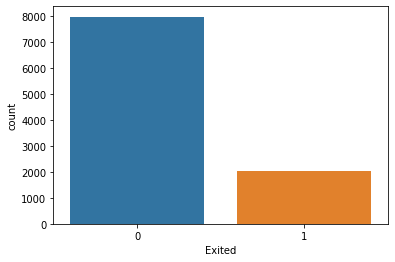

In [104]:
sns.countplot(data['Exited'])    #0 means person not living in bank ,1 means person living 

Imblance data means difference is too high between 0 and 1

In [105]:
X=data.drop('Exited',axis=1)   # X is independent variable
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [106]:
Y=data['Exited']

In [107]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Handling Imblanced data with SMOTE
# Two way to use 1.over sampling 2. under sampling

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
X_res,Y_res=SMOTE().fit_resample(X,Y)

In [110]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                1              1
687          62   1       146252.809770  1              1          0               126335.065419    0                  0                1              1
             47   4       139897.421549  1              1          0               173583.522896    0                  1                0              1
                  7       0.000000       2              1          1               177624.010000    0                  0                0              1
             48   4       0.000000       2              1          1               170893.850000    0                  0                1              1
                                                                                       

In [111]:
Y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Splitting SMOTE data into traning and test

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler                                  #Feature  Scaling SMOTE data

In [115]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression         #Logisticregression SMOTE data

In [117]:
log=LogisticRegression()

In [118]:
log.fit(X_train,Y_train)

LogisticRegression()

In [119]:
Y_pred1=log.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(Y_test, Y_pred1)

0.7831136220966729

In [122]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [123]:
precision_score(Y_test, Y_pred1)

0.7700501253132832

In [124]:
recall_score(Y_test, Y_pred1)

0.7913715389568577

In [125]:
f1_score(Y_test, Y_pred1)

0.7805652588123214

# splitting data set into traning set and test set

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

[      CreditScore  Age  Tenure  ...  Geography_Germany  Geography_Spain  Gender_Male
 2151          753   57       7  ...                  0                0            1
 8392          739   32       3  ...                  1                0            1
 5006          755   37       0  ...                  1                0            0
 4117          561   37       5  ...                  0                0            1
 7182          692   49       6  ...                  1                0            1
 ...           ...  ...     ...  ...                ...              ...          ...
 4555          688   35       6  ...                  0                1            0
 4644          712   74       5  ...                  0                1            1
 8942          667   37       9  ...                  0                0            0
 2935          687   35       8  ...                  0                1            1
 6206          802   51       7  ...                  

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [129]:
X_train,X_test,Y_train,Y_test

(      CreditScore  Age  Tenure  ...  Geography_Germany  Geography_Spain  Gender_Male
 2151          753   57       7  ...                  0                0            1
 8392          739   32       3  ...                  1                0            1
 5006          755   37       0  ...                  1                0            0
 4117          561   37       5  ...                  0                0            1
 7182          692   49       6  ...                  1                0            1
 ...           ...  ...     ...  ...                ...              ...          ...
 4555          688   35       6  ...                  0                1            0
 4644          712   74       5  ...                  0                1            1
 8942          667   37       9  ...                  0                0            0
 2935          687   35       8  ...                  0                1            1
 6206          802   51       7  ...                  

In [130]:
#Feature  Scaling

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [133]:
X_train     # This is feature scaling

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [134]:
X_test

array([[-0.66718803, -0.27324727,  0.69686459, ..., -0.58042949,
        -0.55809982,  0.93228691],
       [-1.28654133, -0.56367837, -0.34712731, ...,  1.72286214,
        -0.55809982,  0.93228691],
       [-0.95621957,  0.11399421, -0.34712731, ..., -0.58042949,
         1.79179416, -1.07263117],
       ...,
       [-1.37944433,  0.79166679,  1.39285919, ...,  1.72286214,
        -0.55809982, -1.07263117],
       [ 0.4063577 ,  0.01718384,  0.69686459, ..., -0.58042949,
        -0.55809982,  0.93228691],
       [ 1.03603357, -0.56367837, -1.0431219 , ..., -0.58042949,
        -0.55809982,  0.93228691]])

# Logistic regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log=LogisticRegression()

In [137]:
log.fit(X_train,Y_train)

LogisticRegression()

In [138]:
Y_pred1=log.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(Y_test, Y_pred1)

0.809

In [141]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [142]:
precision_score(Y_test, Y_pred1)

0.5939849624060151

In [143]:
recall_score(Y_test, Y_pred1)

0.1941031941031941

In [144]:
f1_score(Y_test, Y_pred1)

0.29259259259259257

# Compare data  inblance SMOTE  and imblance
precision score 0.765664160401002|0.593984962406015
recall score   0.7868641339343206 |0.1941031941031941 
f1 score      0.7761194029850745|0.29259259259259257

# SVC(Suport vector classified)

In [145]:
from sklearn import svm

In [146]:
svm=svm.SVC()

In [147]:
svm.fit(X_train, Y_train)

SVC()

In [148]:
Y_pred2= svm.predict(X_test)

In [149]:
accuracy_score(Y_test, Y_pred2)

0.8625

In [150]:
precision_score(Y_test, Y_pred2)

0.8367346938775511

In [151]:
recall_score(Y_test, Y_pred2)

0.40294840294840295

In [152]:
f1_score(Y_test, Y_pred2)

0.5439469320066336

#Kneighbors Classifier

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn= KNeighborsClassifier()

In [155]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [156]:
Y_pred3=knn.predict(X_test)

In [157]:
accuracy_score(Y_test,Y_pred3)

0.824

In [158]:
precision_score(Y_test,Y_pred3)

0.6200873362445415

# Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dt=DecisionTreeClassifier()

In [161]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [162]:
Y_pred4=dt.predict(X_test)

In [163]:
accuracy_score(Y_test,Y_pred4)

0.794

In [164]:
precision_score(Y_test,Y_pred4)

0.4942263279445728

#Random Forest Classifire

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf=RandomForestClassifier()

In [167]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [168]:
Y_pred5=rf.predict(X_test)

In [169]:
accuracy_score(Y_test,Y_pred5)

0.862

In [170]:
precision_score(Y_test,Y_pred5)

0.7695473251028807

#Gradient Boosting Classifier

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
gbc=GradientBoostingClassifier()

In [173]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [174]:
Y_pred6=gbc.predict(X_test)

In [175]:
accuracy_score(Y_test,Y_pred6)

0.8685

In [176]:
precision_score(Y_test,Y_pred6)

0.7926829268292683

#Visualize the all ML model

In [177]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test,Y_pred2),
                                accuracy_score(Y_test,Y_pred3),
                                accuracy_score(Y_test,Y_pred4),
                                accuracy_score(Y_test,Y_pred5),
                                accuracy_score(Y_test,Y_pred6)]})

In [179]:
final_data

,Models,ACC
0,LR,0.8090
1,SVC,0.8625
2,KNN,0.8240
3,DT,0.7940
4,RF,0.8620
5,GBC,0.8685


In [180]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


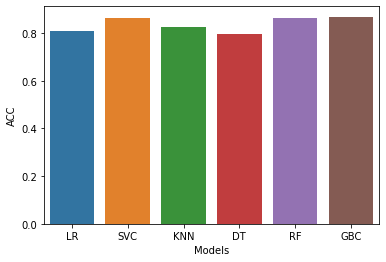

In [182]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [183]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'PRE':[precision_score(Y_test,Y_pred1),
                                precision_score(Y_test,Y_pred2),
                                precision_score(Y_test,Y_pred3),
                                precision_score(Y_test,Y_pred4),
                                precision_score(Y_test,Y_pred5),
                                precision_score(Y_test,Y_pred6)]})

In [185]:
final_data     #PRECISION MODEL WTTH ML

,Models,PRE
0,LR,0.593985
1,SVC,0.836735
2,KNN,0.620087
3,DT,0.494226
4,RF,0.769547
5,GBC,0.792683


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


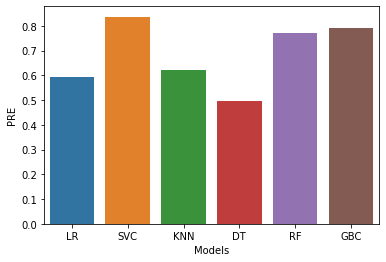

In [184]:
sns.barplot(final_data['Models'],final_data['PRE'])  #PRECISION MODEL PLOT WTTH ML

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'PRE':[precision_score(Y_test,Y_pred1),
                                precision_score(Y_test,Y_pred2),
                                precision_score(Y_test,Y_pred3),
                                precision_score(Y_test,Y_pred4),
                                precision_score(Y_test,Y_pred5),
                                precision_score(Y_test,Y_pred6)]})

Conclusion
GBC is better for Forecasting Model